# Statlog (Heart)

In [1]:
import pandas as pd
import ehrapy as ep
import ehrdata as ed
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [3]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat -O statlog_heart.data
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.doc



7[Files: 0  Bytes: 0  [0 B/s] Re]87[http://archive.ics.uci.edu/ml/]87Saving 'statlog_heart.data'
87statlog_heart.data   100% [=============================>]   28.44K    --.-KB/s87HTTP response 200 OK [http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat]
87statlog_heart.data   100% [=============================>]   28.44K    --.-KB/s87[Files: 1  Bytes: 28.44K [57.12]8Nothing to do - goodbye


# Data Wrangling

In [4]:
names = ['age', 'sex', 'chest pain type', 'resting blood pressure', 'serum cholestoral',
         'fasting blood sugar', 'resting electrocardiographic results', 'maximum heart rate achieved', 'exercise induced angina', 'oldpeak',
         'the slope of the peak exercise ST segment', 'number of major vessels', 'thal', 'class']

In [5]:
data = pd.read_csv("statlog_heart.data", sep=" ", names=names)

Since the dataset does not have a patient ID we add one.

In [6]:
data["patient_id"] = range(1, len(data) + 1)

Replace the original encoding (1, 2) to (0, 1) in class attribute

In [7]:
data["class"].replace((1, 2), (0, 1), inplace=True)

In [8]:
data.set_index("patient_id", inplace=True)

In [9]:
data.to_csv("statlog_heart_prepared.csv")

## ehrapy sanity check

In [10]:
adata = ep.io.read_csv("statlog_heart_prepared.csv",
                   index_column="patient_id")
edata = ed.EHRData.from_adata(adata=adata)


In [11]:
edata.var_names

Index(['age', 'sex', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'maximum heart rate achieved',
       'exercise induced angina', 'oldpeak',
       'the slope of the peak exercise ST segment', 'number of major vessels',
       'thal', 'class'],
      dtype='object')

In [12]:
ep.ad.feature_type_overview(edata)

! Features 'sex', 'chest pain type', 'fasting blood sugar', 'resting electrocardiographic results', 'exercise induced angina', 'the slope of the peak exercise ST segment', 'number of major vessels', 'class' were detected as categorical features stored numerically.Please verify and correct using `ep.ad.replace_feature_types` if necessary.
! Feature types were inferred and stored in adata.var[feature_type]. Please verify using `ep.ad.feature_type_overview` and adjust if necessary using `ep.ad.replace_feature_types`.


 Detected feature types for AnnData object with 270 obs and 14 vars
╠══ 📅 Date features
╠══ 📐 Numerical features
║   ╠══ age
║   ╠══ maximum heart rate achieved
║   ╠══ oldpeak
║   ╠══ resting blood pressure
║   ╠══ serum cholestoral
║   ╚══ thal
╚══ 🗂️ Categorical features
    ╠══ chest pain type (4 categories)
    ╠══ class (2 categories)
    ╠══ exercise induced angina (2 categories)
    ╠══ fasting blood sugar (2 categories)
    ╠══ number of major vessels (4 categories)
    ╠══ resting electrocardiographic results (3 categories)
    ╠══ sex (2 categories)
    ╚══ the slope of the peak exercise ST segment (3 categories)

Output()

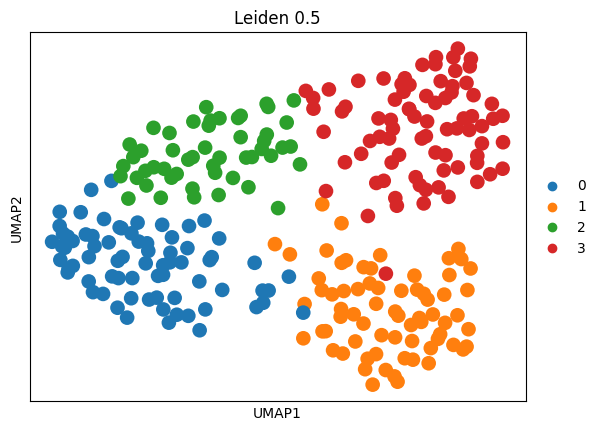

In [13]:
ep.pp.knn_impute(edata)
ep.pp.scale_norm(edata)
ep.pp.pca(edata)
ep.pp.neighbors(edata)
ep.tl.umap(edata)
ep.tl.leiden(edata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(edata, color=["leiden_0_5"], title="Leiden 0.5")

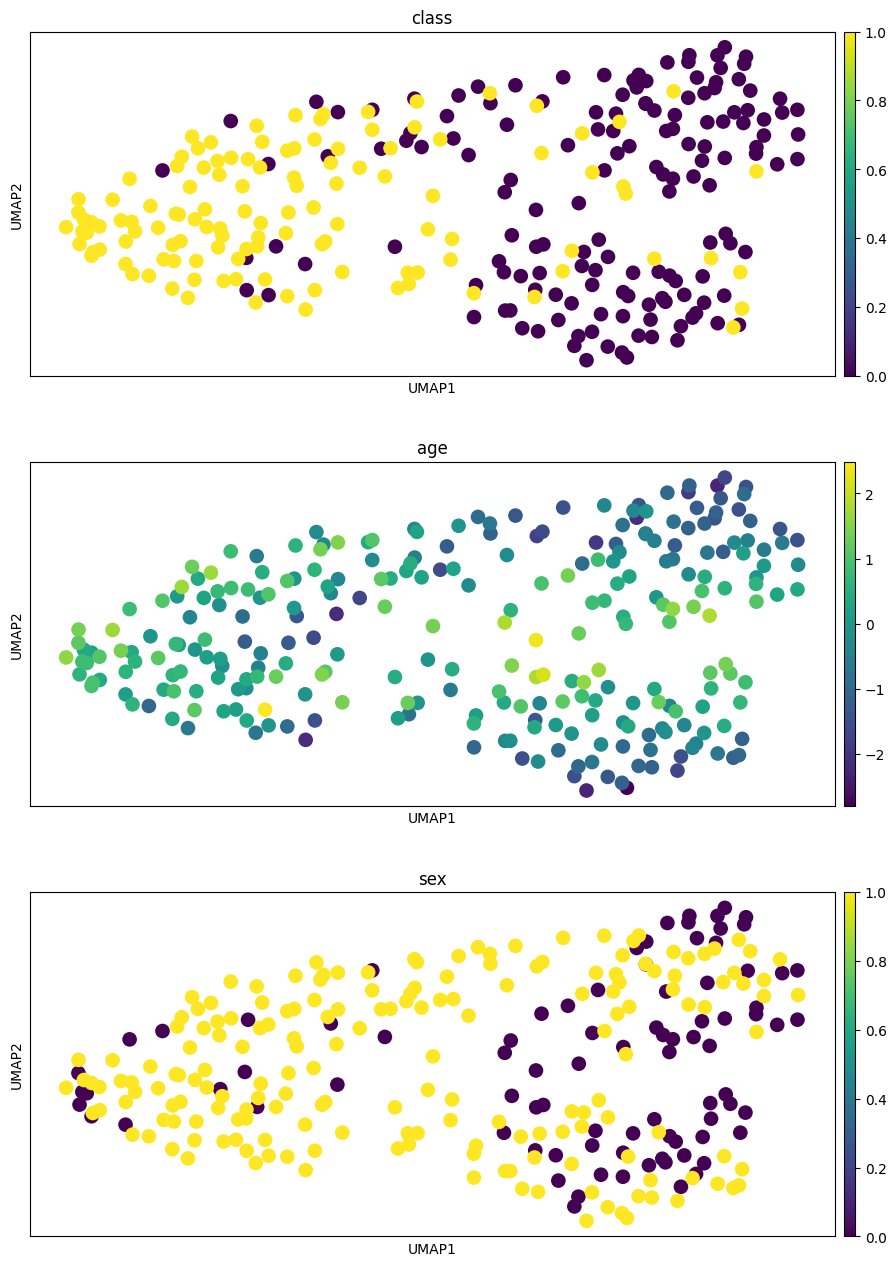

In [14]:
ep.pl.umap(edata, color=["class", "age", "sex"], ncols=1, wspace=0.75)